In [1]:
import pandas as pd

with open('yelp_academic_dataset_checkin.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
checkin_df = pd.read_json(data_json_str)
checkin_df.head()

,business_id,checkin_info,type
0,cE27W9VPgO88Qxe4ol6y_g,"{'17-3': 1, '17-6': 1, '10-0': 1, '9-5': 1, '1...",checkin
1,mVHrayjG3uZ_RLHkLj-AMg,"{'17-4': 1, '10-5': 1, '22-5': 1, '13-1': 1, '...",checkin
2,KayYbHCt-RkbGcPdGOThNg,"{'17-4': 1, '17-3': 2, '21-5': 1, '12-4': 3, '...",checkin
3,b12U9TFESStdy7CsTtcOeg,"{'5-5': 2, '8-2': 1, '5-1': 2}",checkin
4,QoDa50dc7g62xciFygXB9w,"{'13-3': 1, '16-0': 1, '12-1': 1, '15-1': 1, '...",checkin


In [2]:
def merge_dict(left, right):
    for k, v in right.items():
        if k in left:
            left[k] += v
        else:
            left[k] = v
    return left

time_dist = {}
for index, row in checkin_df.iterrows():
    time_dist = merge_dict(time_dist, row['checkin_info'])
    
df = pd.DataFrame({"time window": list(time_dist.keys()), "count": list(time_dist.values())})
df.head()

,count,time window
0,115822,17-4
1,6457,4-6
2,53660,22-5
3,53369,14-1
4,81182,12-2


/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


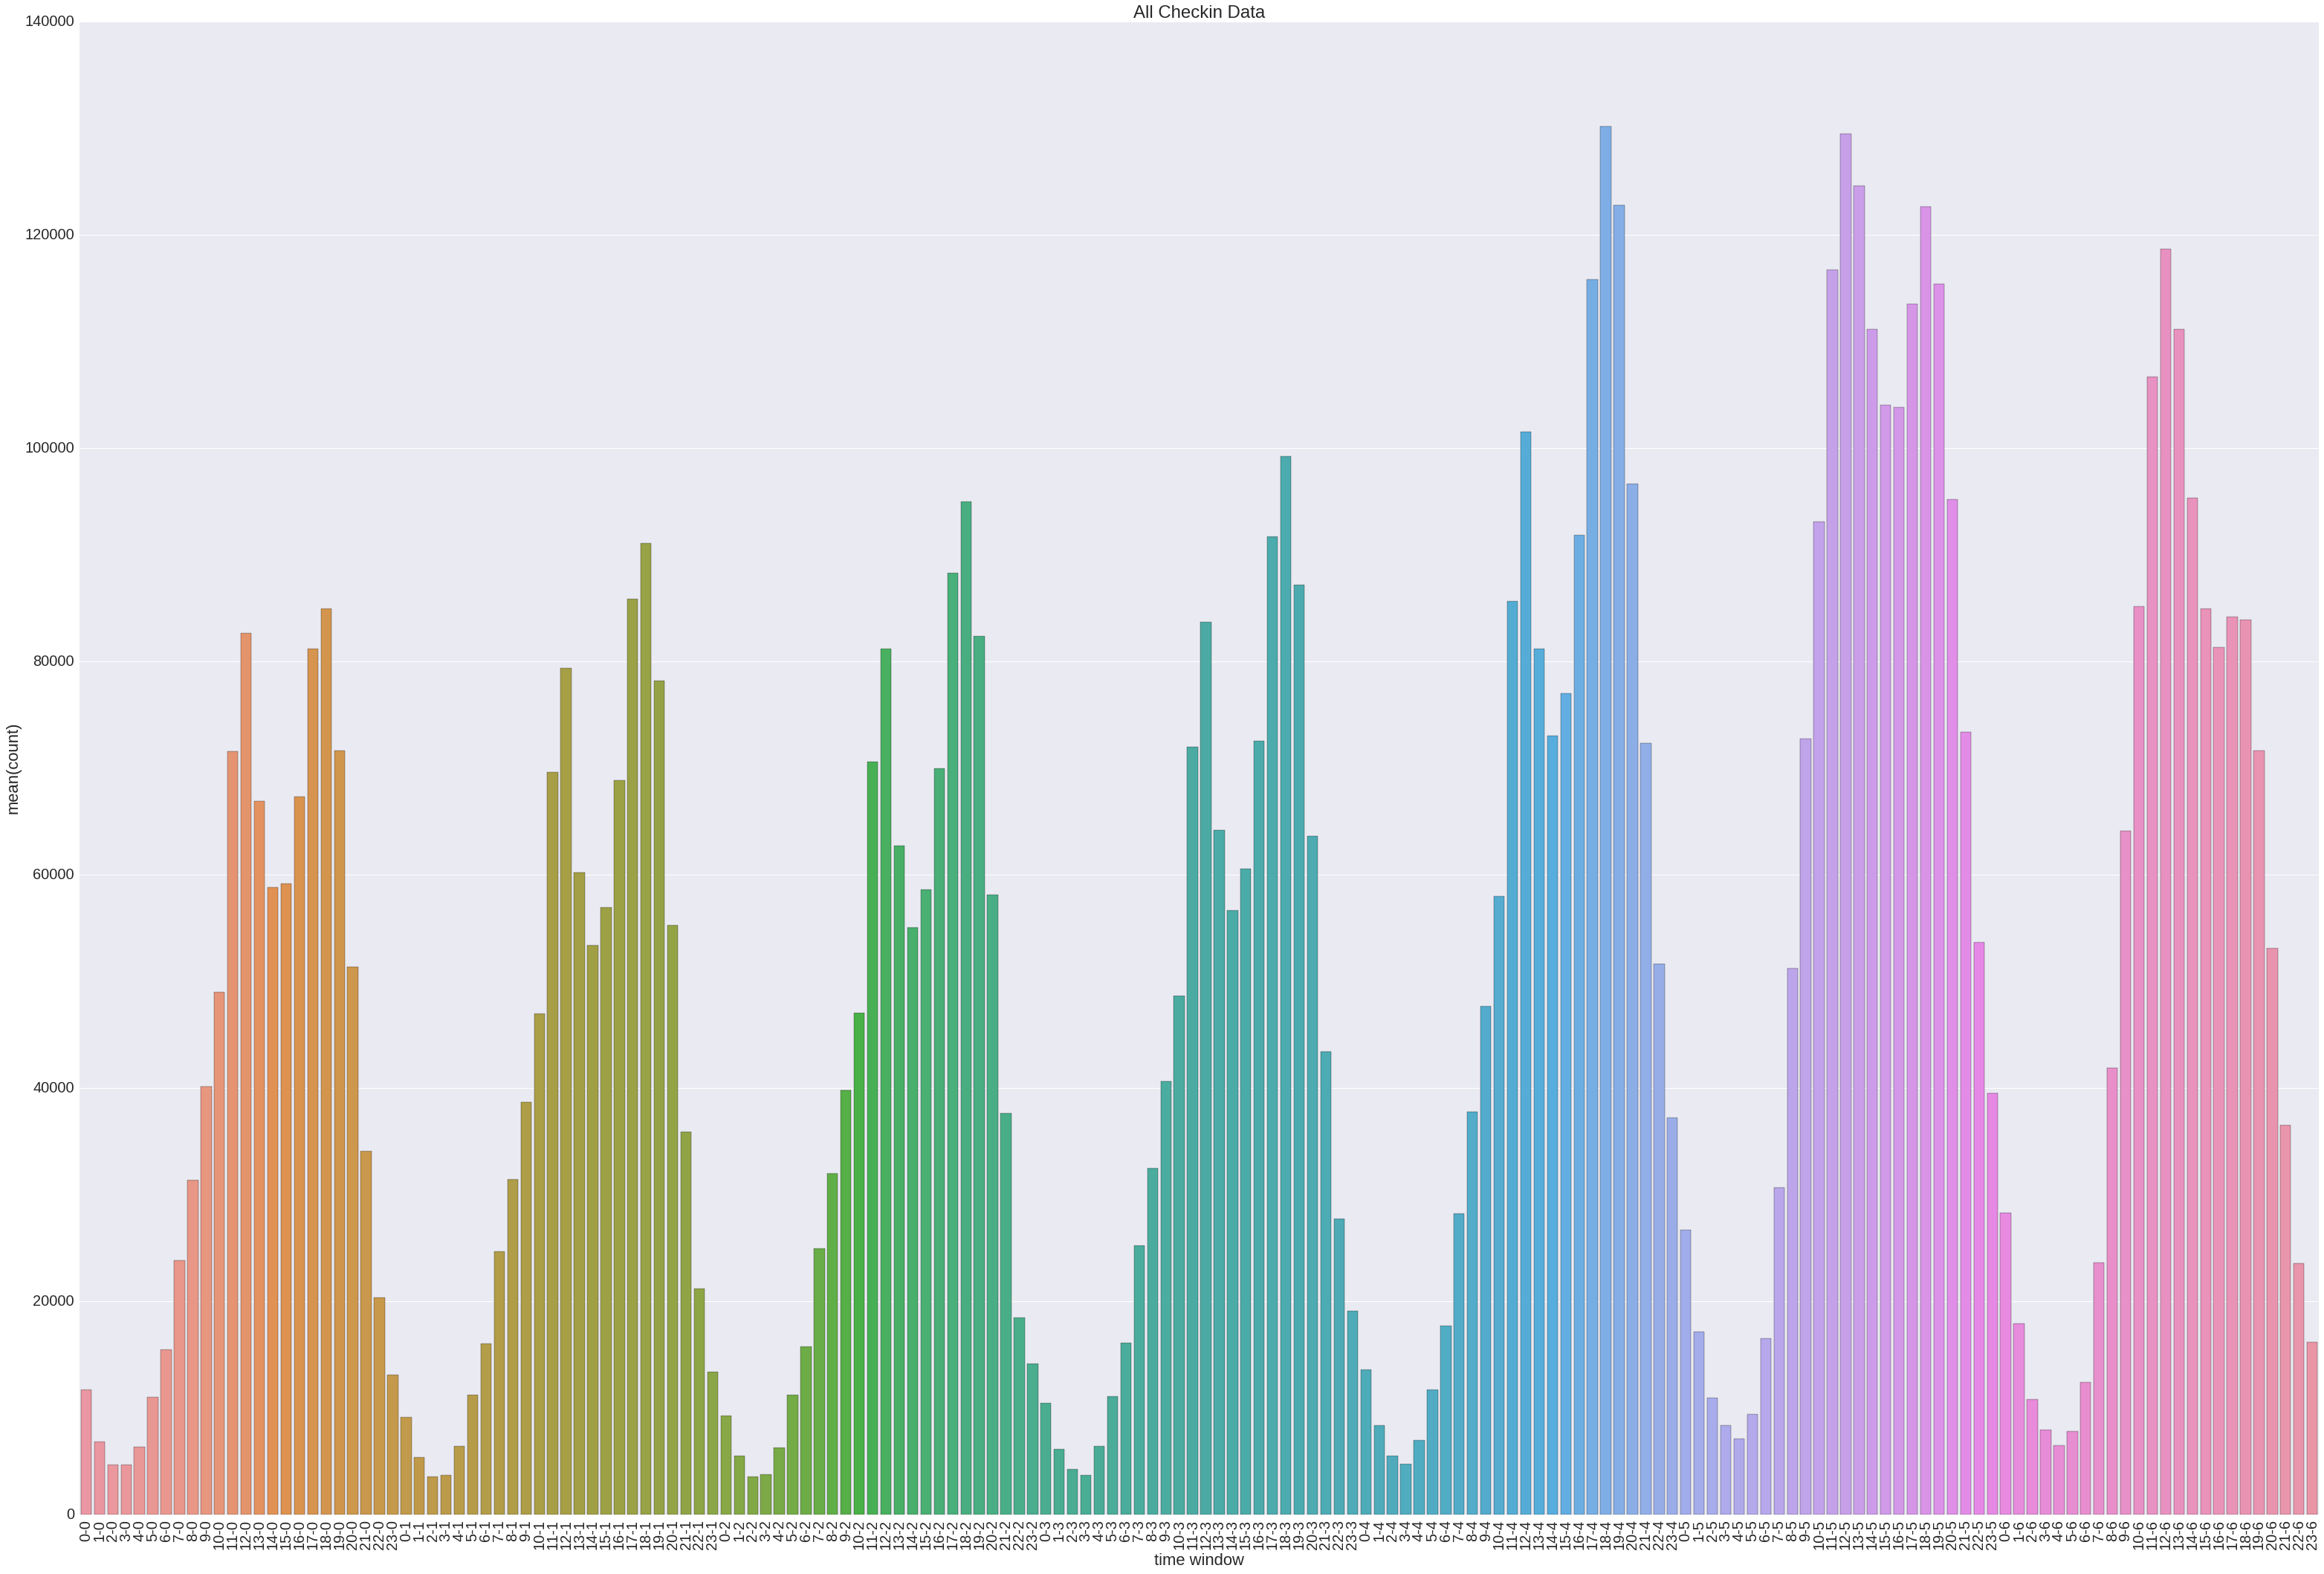

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def get_sort_weight(row):
    parts = row['time window'].split('-')
    return int(parts[0]) + ((int(parts[1])+1)*24)

sns.set()
plt.figure(figsize=(54,36))
df['sort_weights'] = df.apply(lambda row: get_sort_weight(row), axis=1)
sorted_df = df.sort_values('sort_weights', ascending=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
ax = sns.barplot(x='time window', y='count', data=sorted_df)
ax.set_xticklabels(rotation=90, labels=sorted_df['time window'].values)
ax.set_title("All Checkin Data")

In [4]:
with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
business_df = pd.read_json(data_json_str)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Ambience': {'hipster': False, 'upscale': Fal...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Thursday': {'close': '21:00', 'open': '11:00...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,"{'Happy Hour': True, 'Outdoor Seating': False,...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,4,3.5,PA,business
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
4,"{'Parking': {'street': False, 'validated': Fal...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Saturday': {'close': '21:00', 'open': '10:00...",40.357620,-80.059980,Verizon,[],True,5,2.5,PA,business


In [5]:
with open('yelp_academic_dataset_tip.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
tip_df = pd.read_json(data_json_str)
tip_df.head()

,business_id,date,likes,text,type,user_id
0,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw
2,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,tip,xb6zEQCw9I-Gl0g06e1KsQ
3,KayYbHCt-RkbGcPdGOThNg,2015-07-08,0,"Friendly staff, good food, great beer selectio...",tip,QawZN4PSW7ng_9SP7pjsVQ
4,1_lU0-eSWJCRvNGk78Zh9Q,2015-10-25,0,Beautiful restoration.,tip,MLQre1nvUtW-RqMTc4iC9A


In [6]:
#lat-lng borders in [N,E,S,W] order
city_borders = {'Las Vegas':[36.721753, -114, 35.36, -116.32],
               'Phoenix':[34.85,-110.14,31.81,-113.86],
               'Charlotte':[35.52,-80.14,34.84,-81.21],
               'Pittsburgh':[40.76,-79.32,40.08,-80.5],
               'Urbana-Champaign':[40.72,-87.27,39.33,-89.4],
               'Madison':[43.3,-88.87,42.63,-90.11],
               'Edinburgh':[56.03,-2.94,55.79,-3.47],
               'Karlsruhe':[49.11,8.74,48.8,8.19],
               'Montreal':[45.76,-73.06,45.21,-74.16],
               'Waterloo':[43.74,-80.07,43.06,-81.36]}

def get_clean_city(row):
    for k,v in city_borders.items():
        if row.latitude < v[0] and row.latitude > v[2] and row.longitude < v[1] and row.longitude > v[3]:
            return k
        
def get_attr_count(row):
    return len(row['attributes'].keys())
        
business_df['clean_city'] = business_df.apply (lambda row: get_clean_city(row),axis=1)
business_df['attribute_count'] = business_df.apply(lambda row: get_attr_count(row), axis=1)

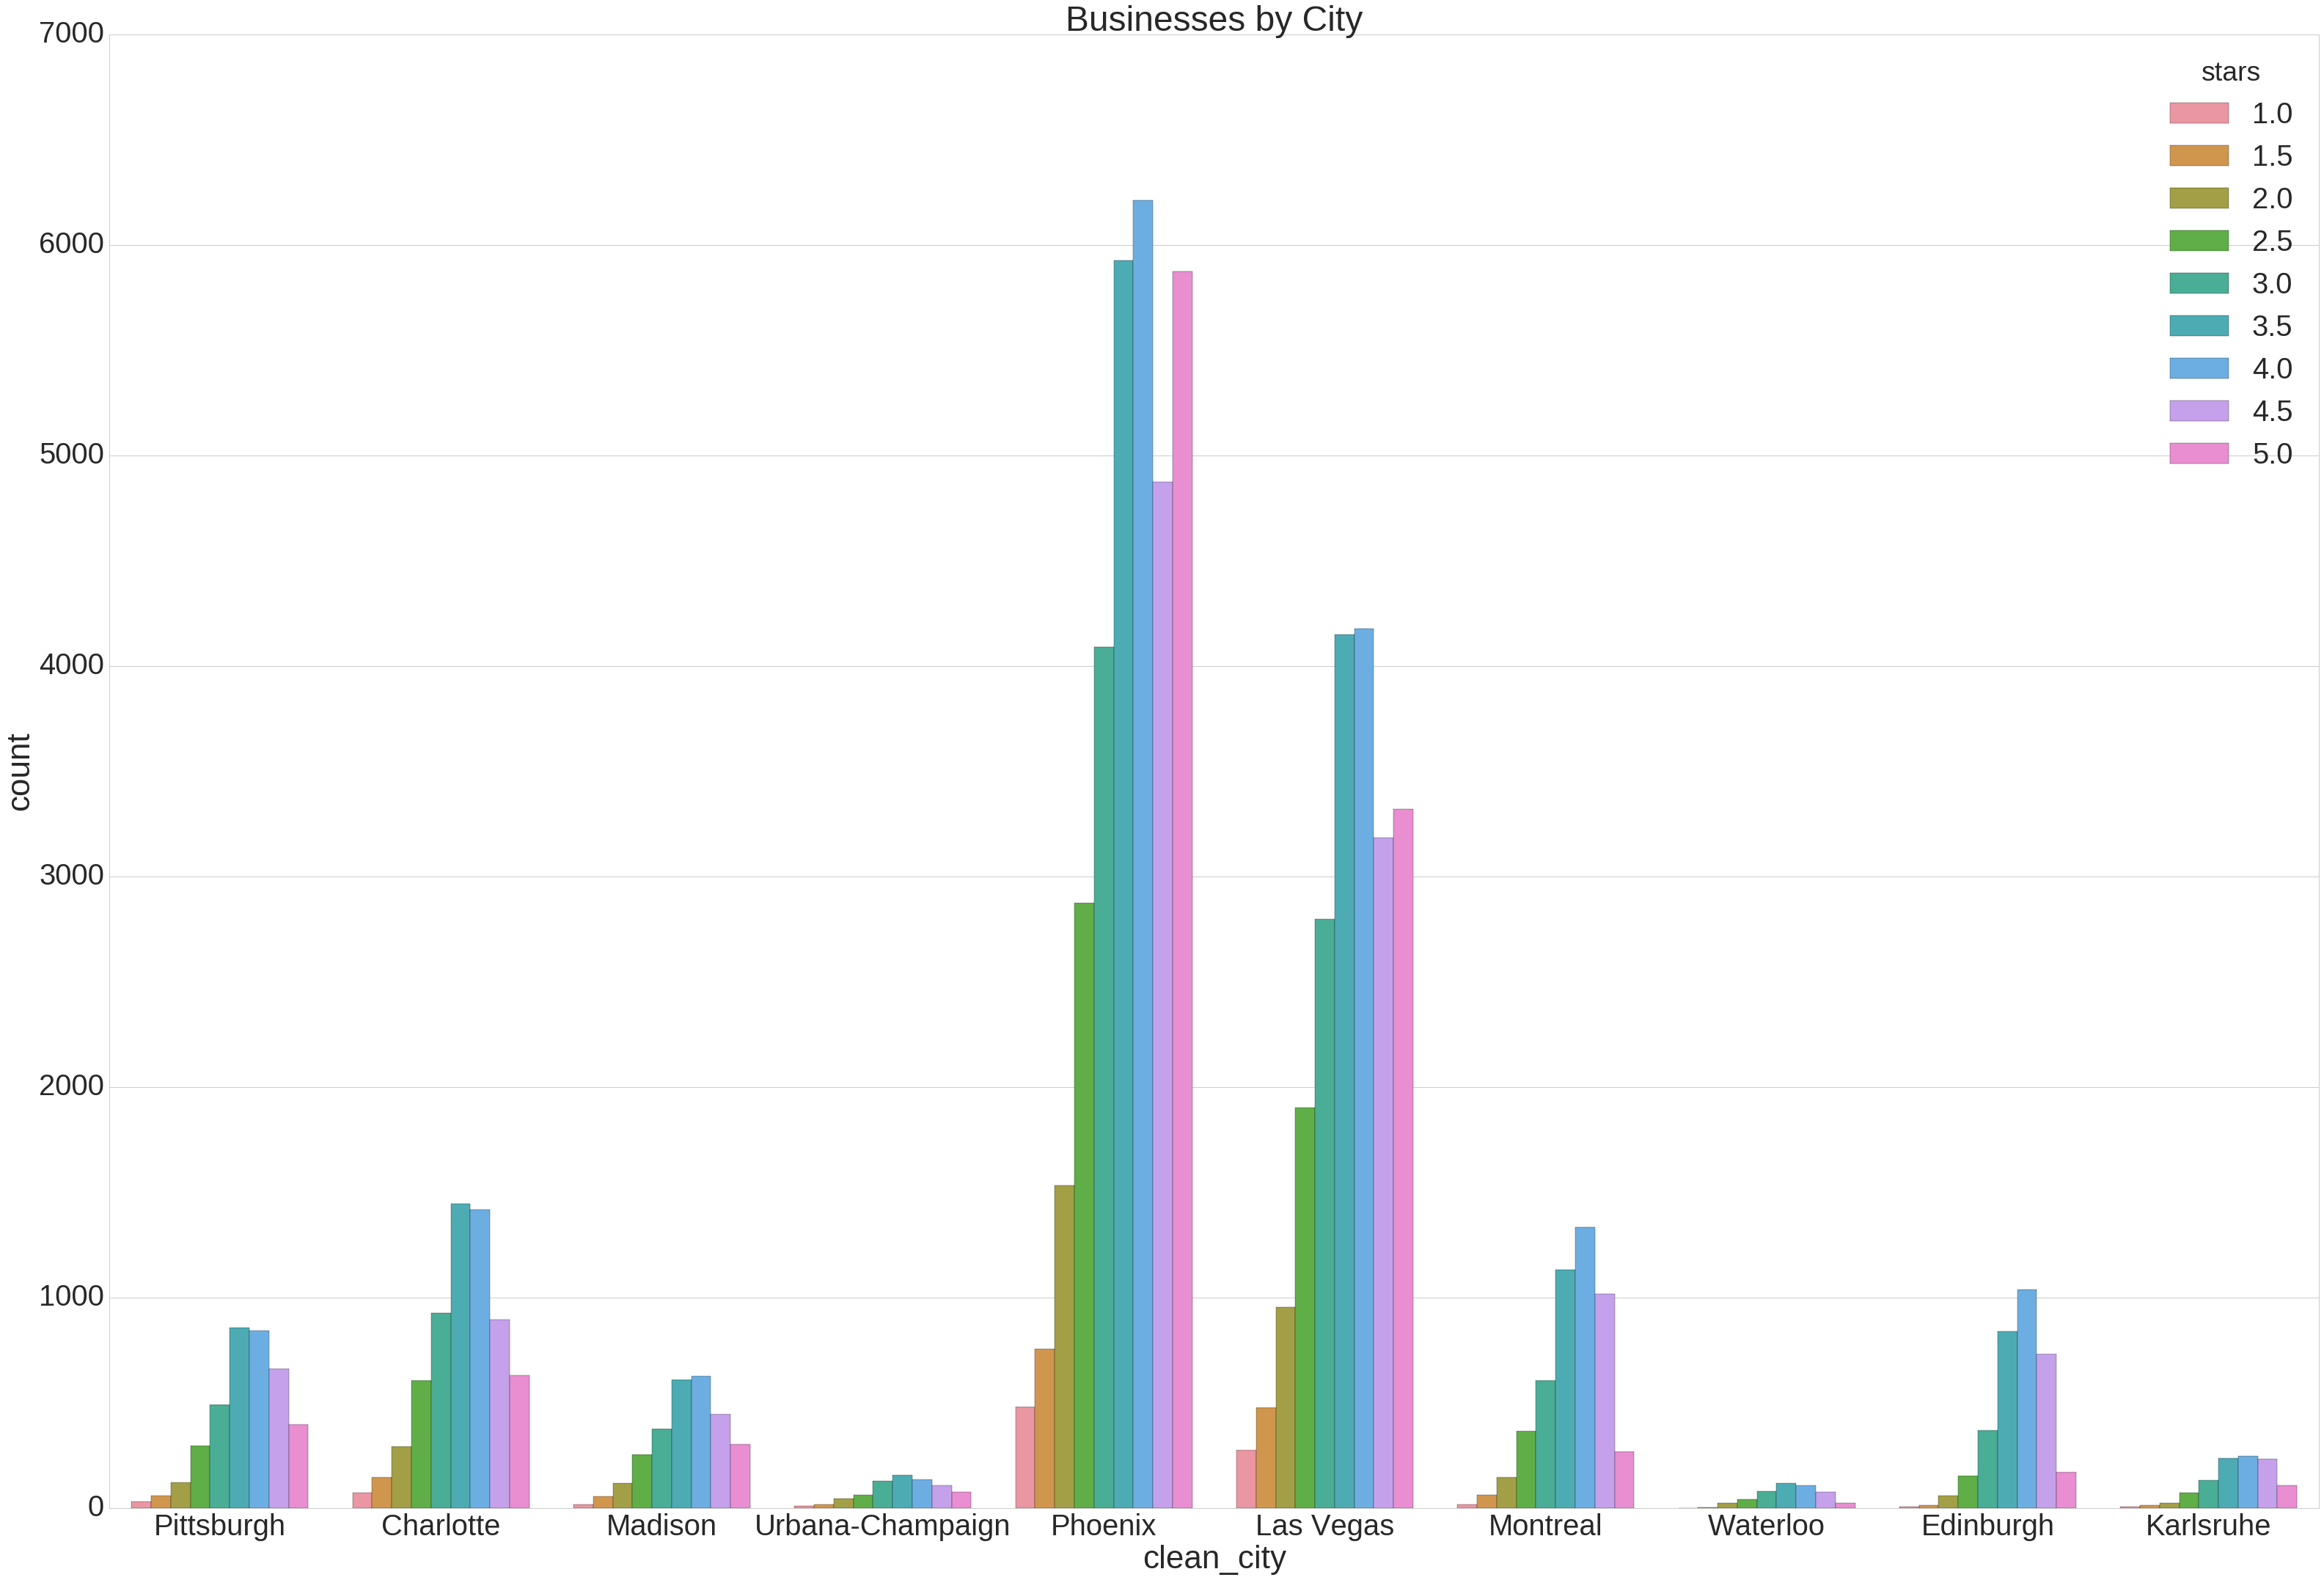

In [7]:
import numpy as np

#business_df.replace('', 'NONE', regex=True)
#print(business_df.city.unique())
#city = business_df.city.astype(str)
#print(city)
plt.figure(figsize=(54,36))
#sns.set_style("ticks", {"xtick.major.size": 0, "ytick.major.size": 0})
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("whitegrid")
ax = sns.countplot(x="clean_city", hue='stars', data=business_df)
#ax.set_xticklabels(rotation=90, labels=business_df['clean_city'].values)
ax.set_title("Businesses by City")

In [8]:
category_map = {'Active Life': 0, 
                   'Arts & Entertainment': 1,
                   'Automotive': 2,
                   'Beauty & Spas': 3,
                   'Education': 4,
                   'Event Planning & Services': 5,
                   'Financial Services': 6,
                   'Food': 7,
                   'Health & Medical': 8,
                   'Home Services': 9,
                   'Hotels & Travel': 10,
                   'Local Flavor': 11,
                   'Local Services': 12,
                   'Mass Media': 13,
                   'Nightlife': 14,
                   'Pets': 15,
                   'Professional Services': 16,
                   'Public Services & Government': 17,
                   'Real Estate': 18,
                   'Religious Organizations': 19,
                   'Restaurants': 20,
                   'Shopping': 21}

def get_top_category(row):
    for cat in row['categories']:
        if cat in category_map:
            return cat
    return "N/A"

business_df['top_level_category'] = business_df.apply (lambda row: get_top_category(row),axis=1)


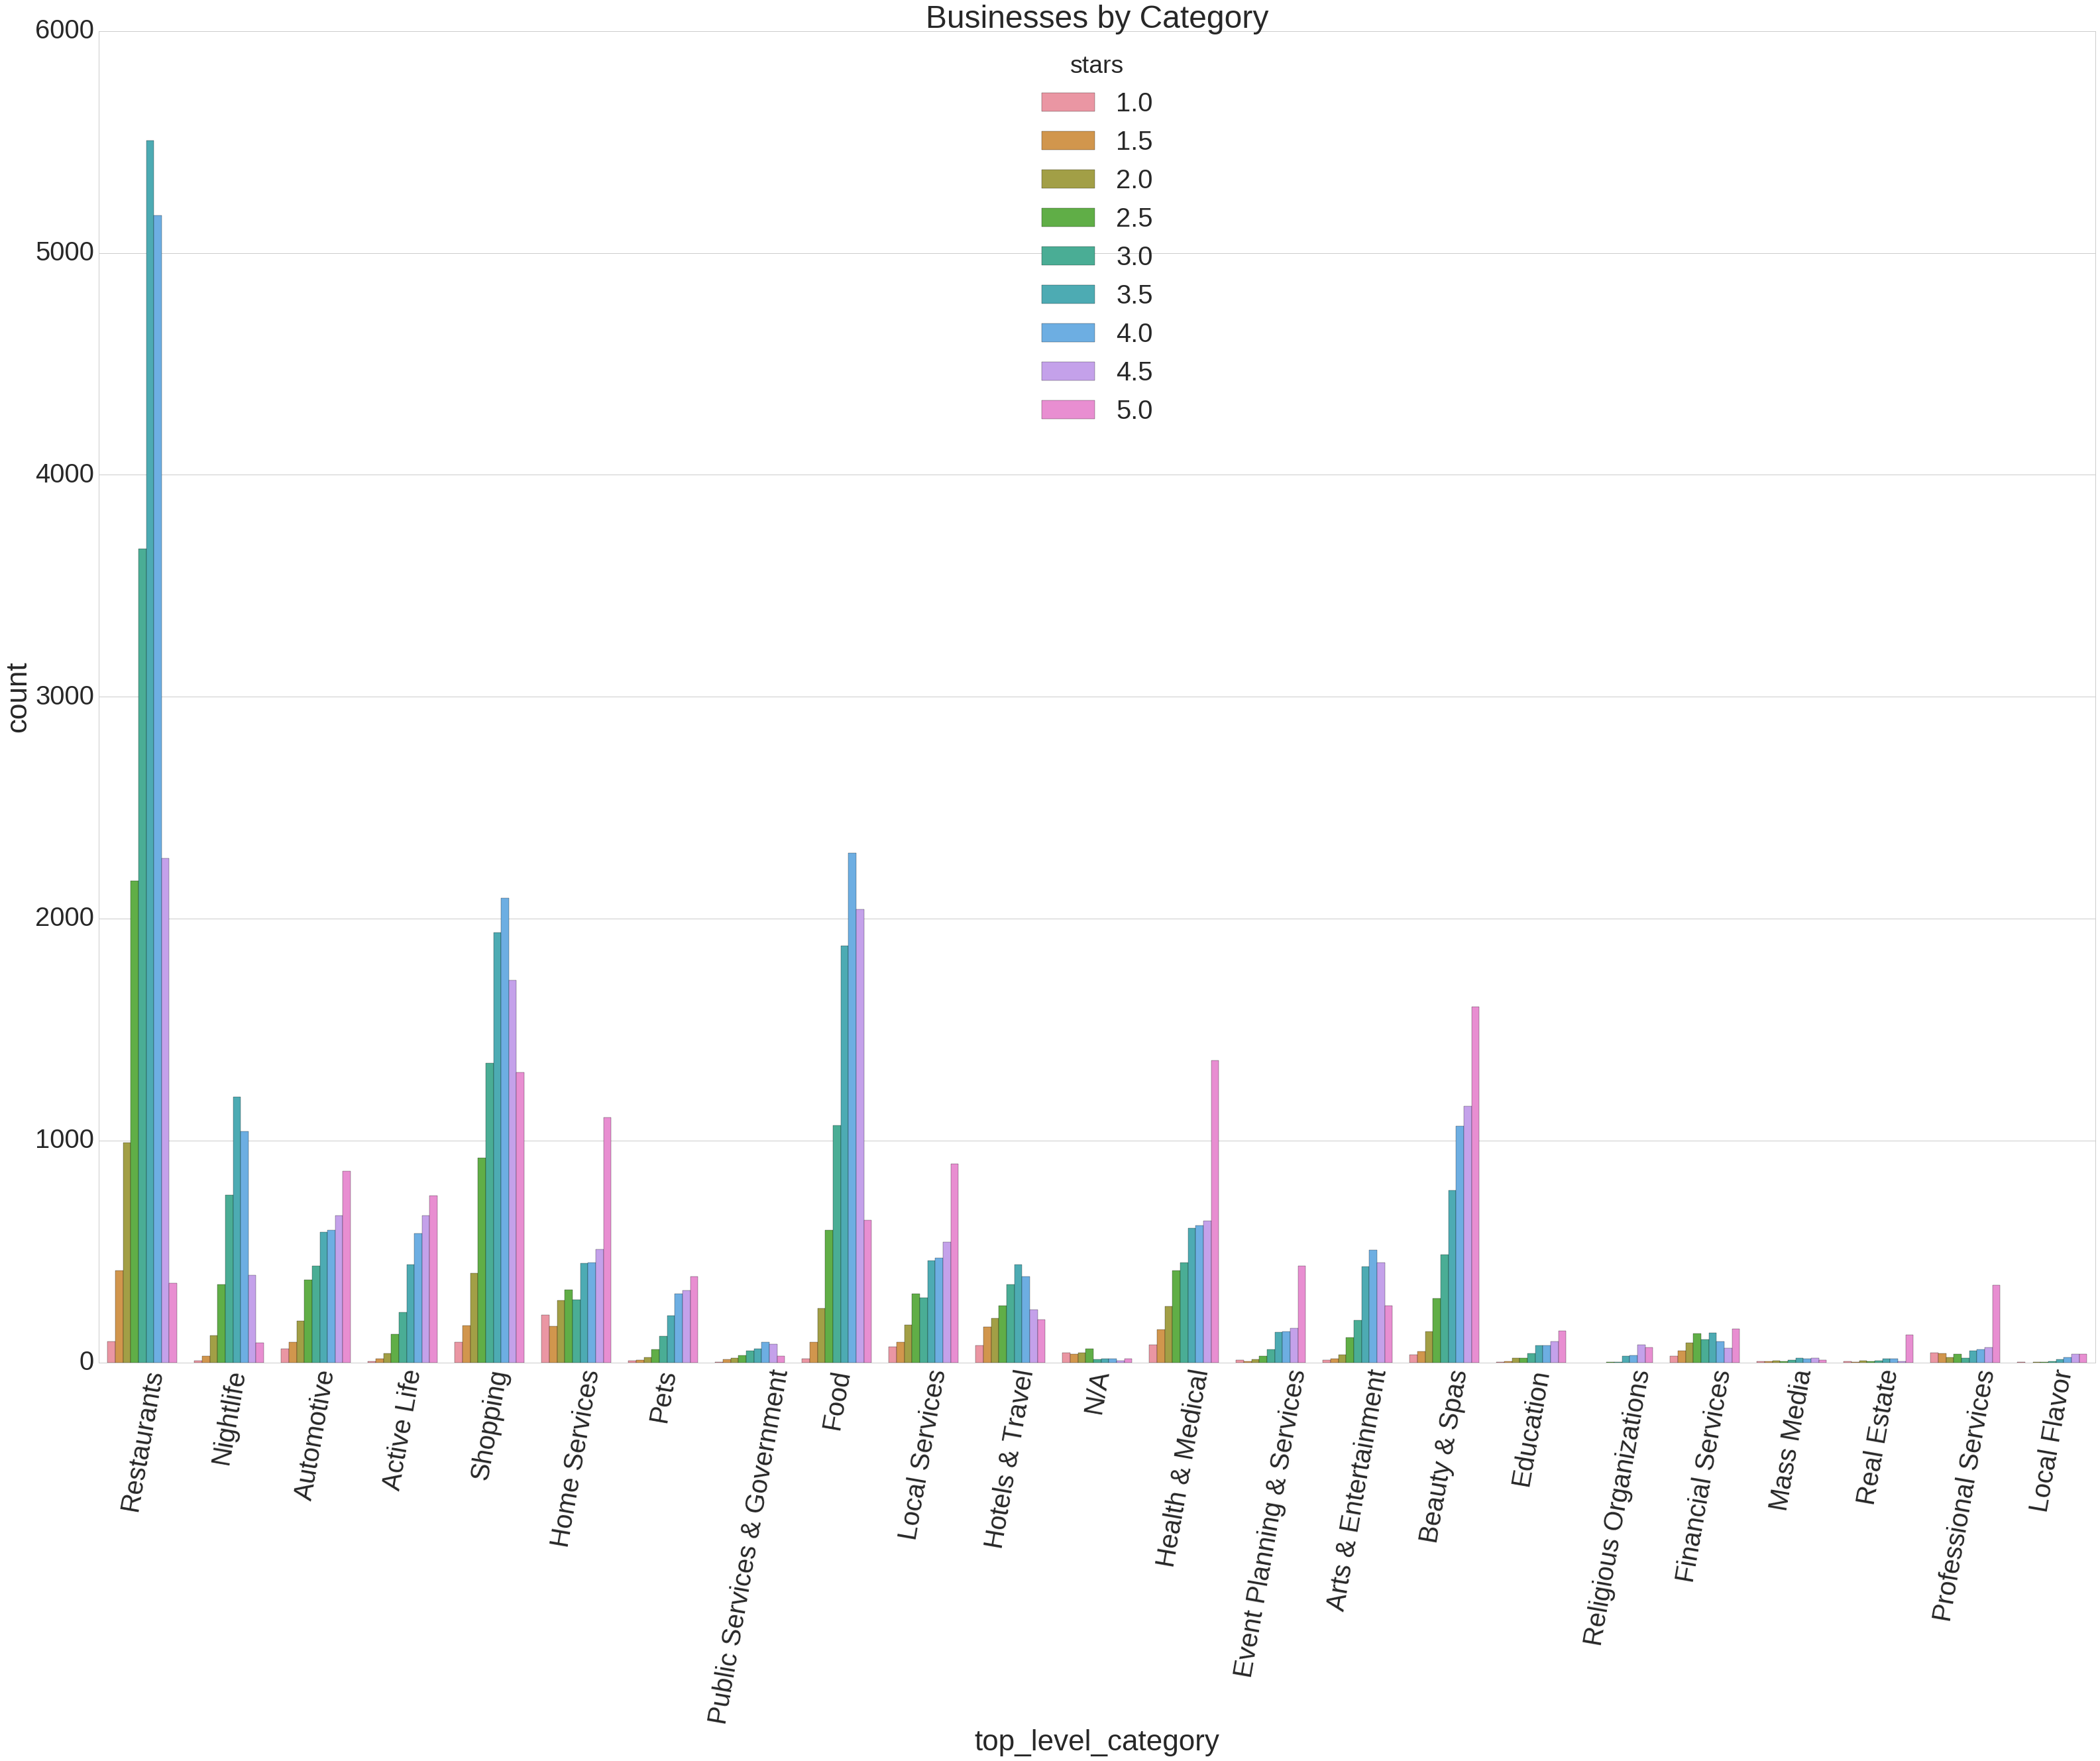

In [9]:
plt.figure(figsize=(54,36))
#sns.set_style("ticks", {"xtick.major.size": 0, "ytick.major.size": 0})
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("whitegrid")
ax = sns.countplot(x="top_level_category", hue="stars", data=business_df)
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set_title("Businesses by Category")

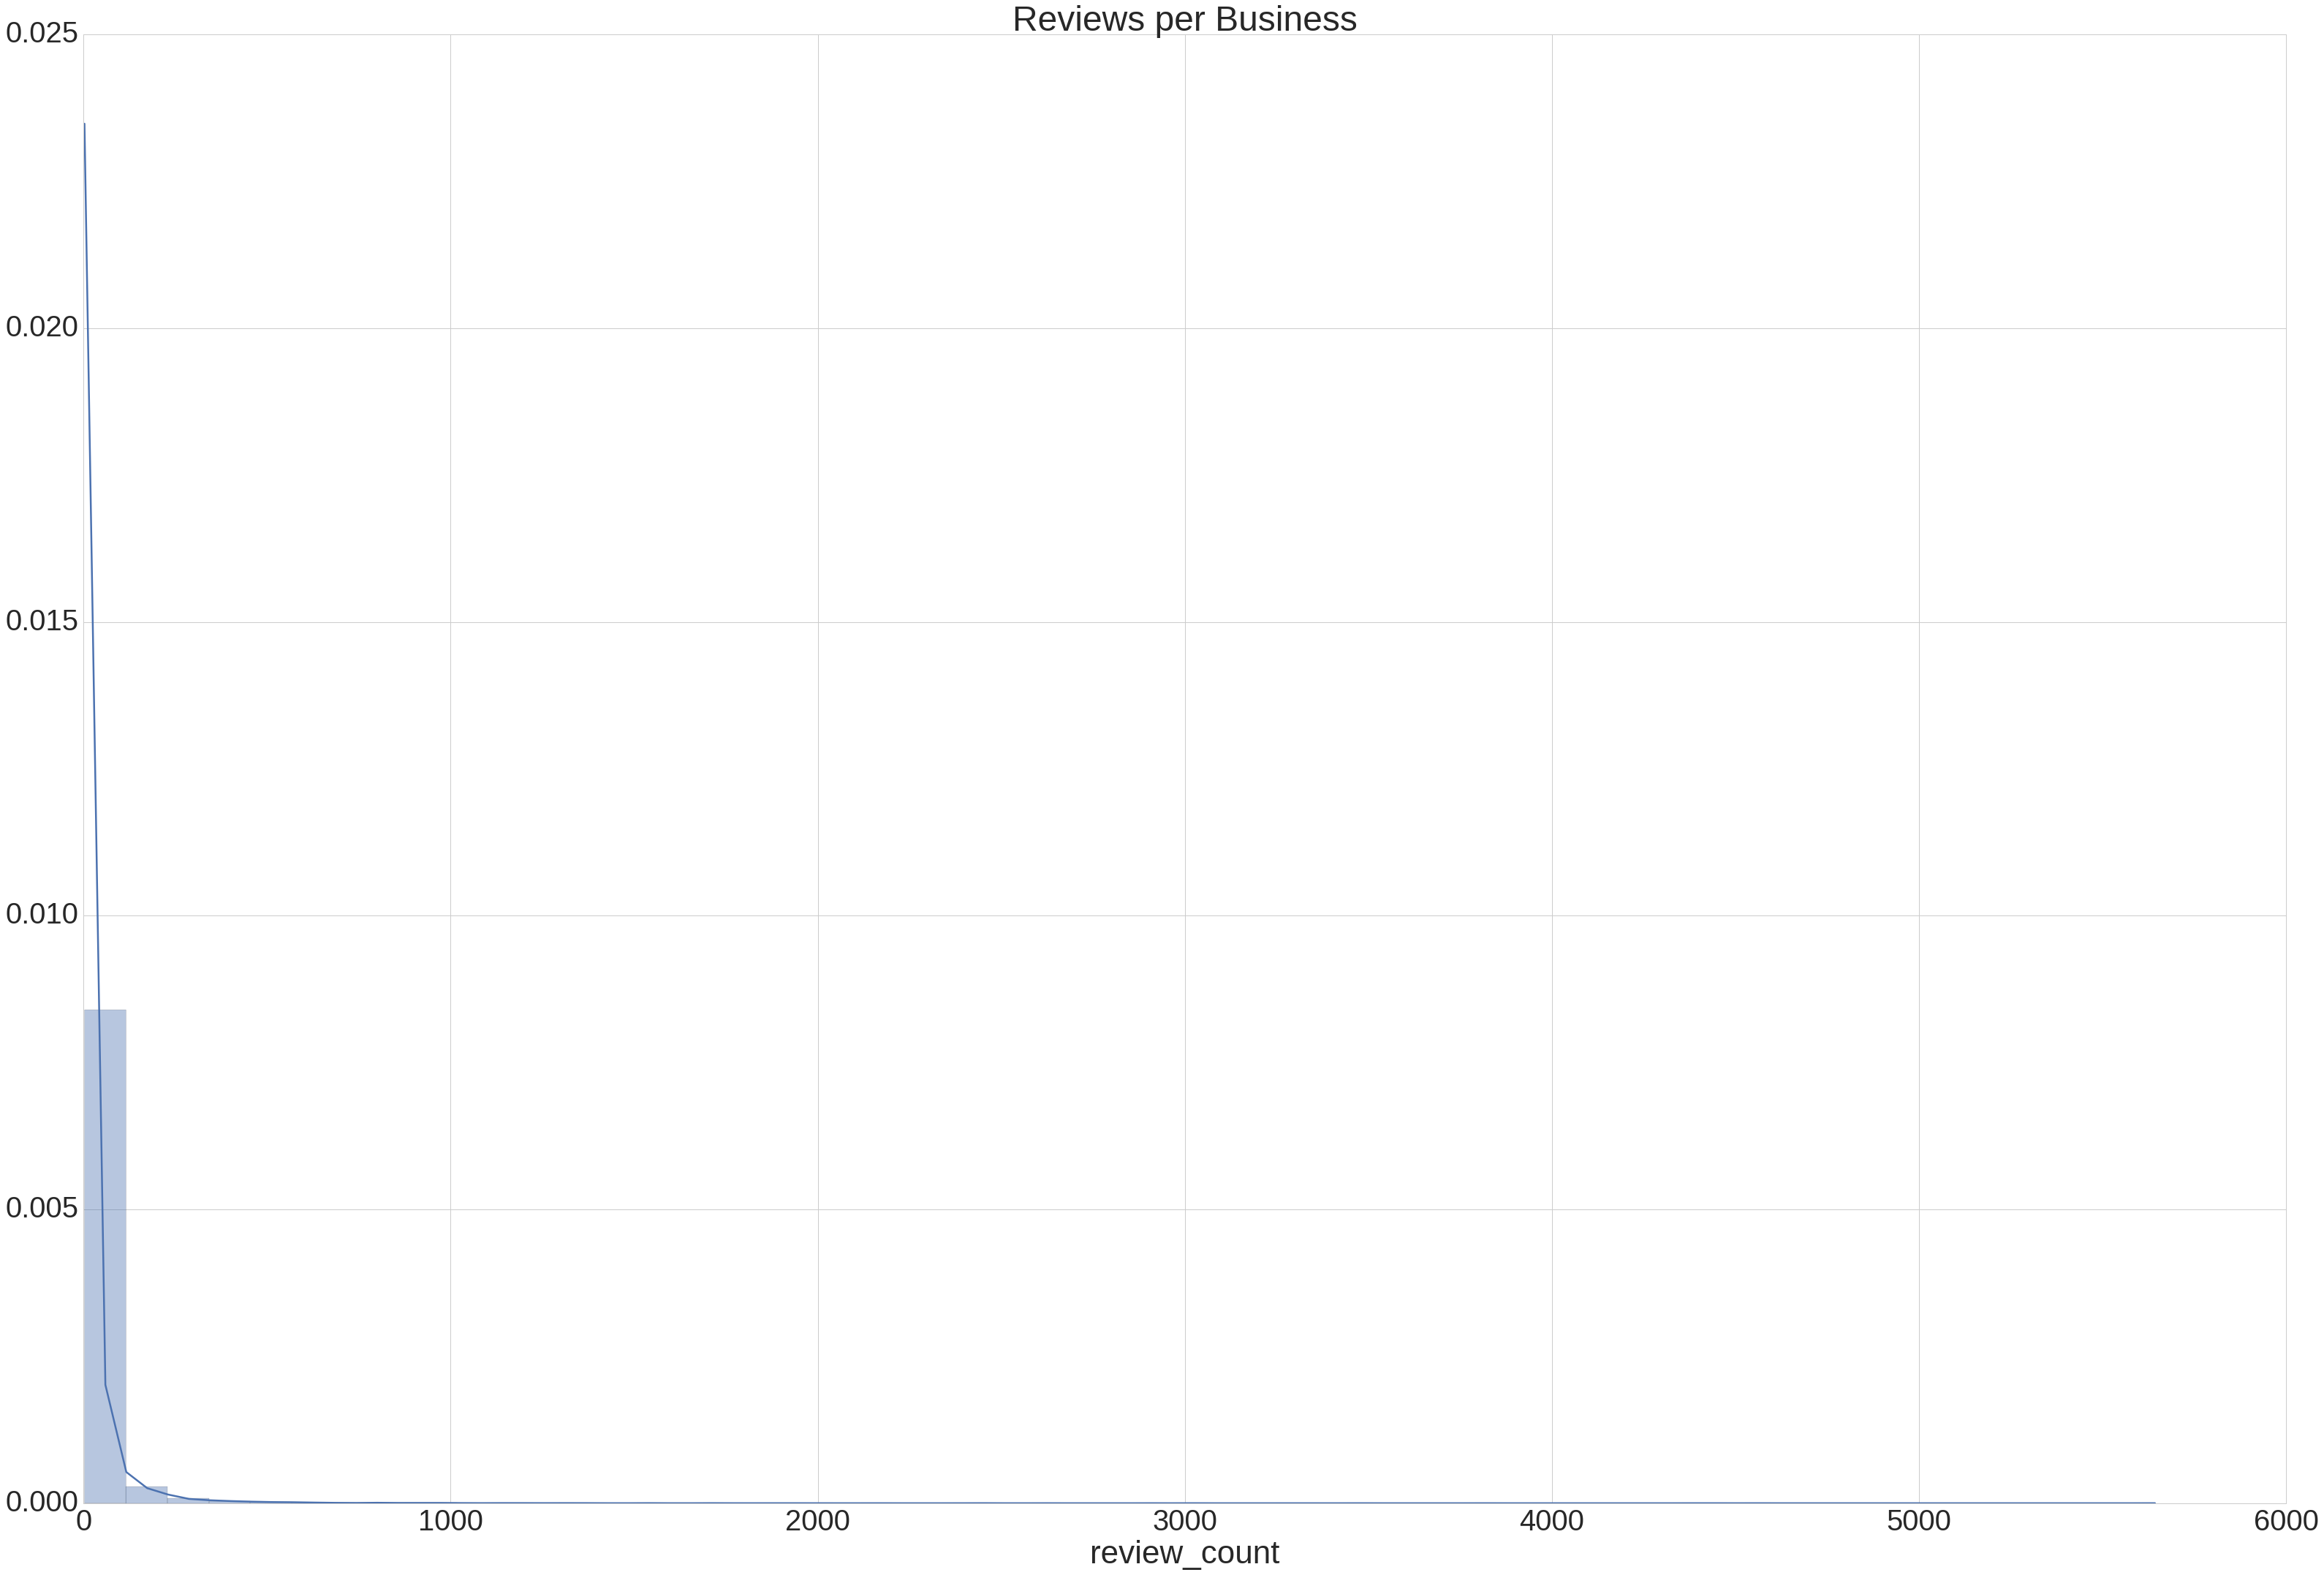

In [10]:
plt.figure(figsize=(54,36))
#ax = sns.countplot(x="review_count", data=business_df)
ax = sns.distplot(business_df['review_count'])
ax.set_title("Reviews per Business")

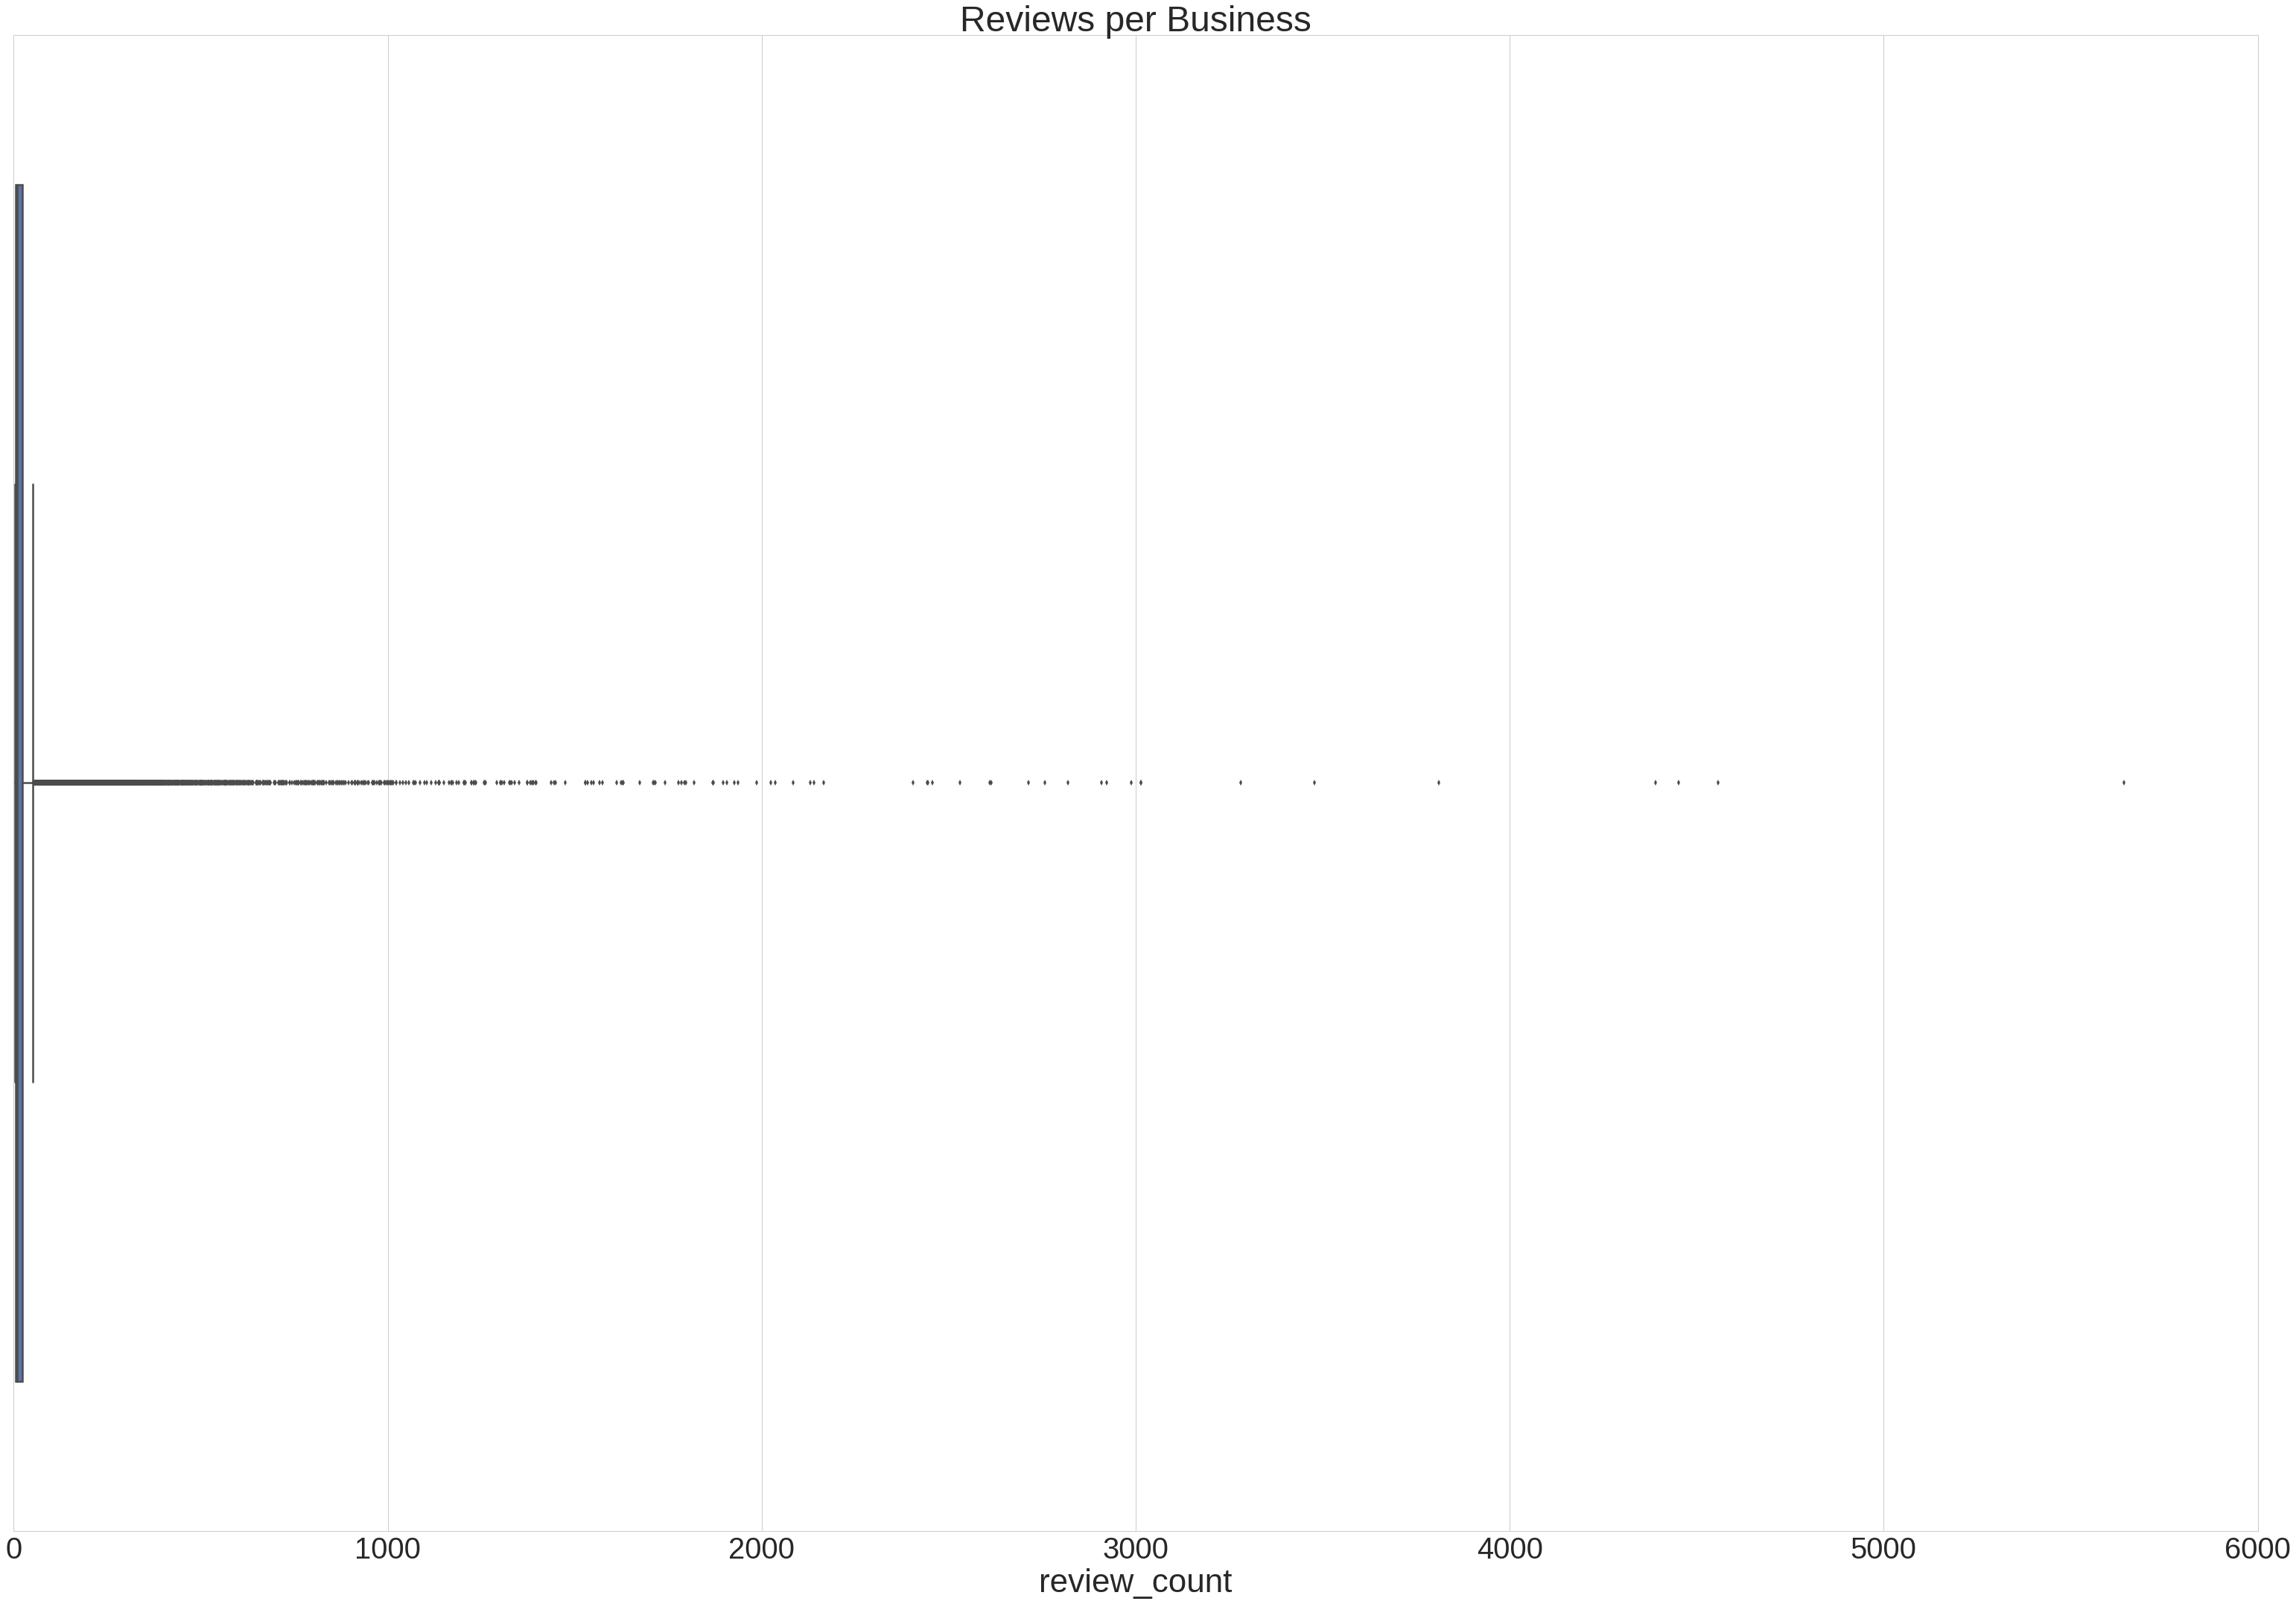

In [11]:
plt.figure(figsize=(54,36))
ax = sns.boxplot(x=business_df["review_count"])
ax.set_title("Reviews per Business")

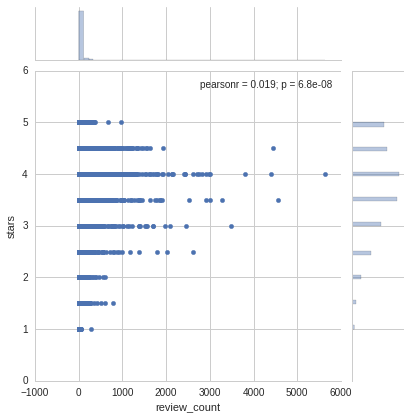

In [12]:
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.jointplot(x="review_count", y="stars", data=business_df)
#ax.set_title("Reviews vs Stars")

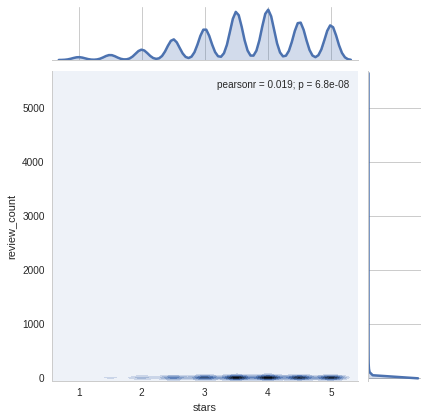

In [13]:
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.jointplot(x="stars", y="review_count", data=business_df, kind='kde')

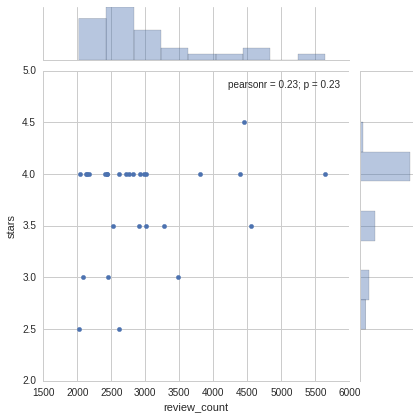

In [14]:
highreview_df = business_df[business_df['review_count'] > 2000]
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.jointplot(x="review_count", y="stars", data=highreview_df)

In [15]:
import pandas as pd
with open('yelp_academic_dataset_review.json', 'rb') as f:
    data = f.readlines()


data = map(lambda x: x.rstrip().decode("utf-8"), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
review_df = pd.read_json(data_json_str)
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}"
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}"
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}"
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,All the food is great here. But the best thing...,review,uK8tzraOp4M5u3uYrqIBXg,"{'funny': 0, 'useful': 0, 'cool': 0}"
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,We checked this place out this past Monday for...,review,I_47G-R2_egp7ME5u_ltew,"{'funny': 0, 'useful': 0, 'cool': 0}"


In [16]:
def get_word_count(row):
    words = row['text'].split(' ')
    return len(words)
    

review_df['word_count'] = review_df.apply(lambda row: get_word_count(row),axis=1)
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes,word_count
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}",83
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}",23
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}",73
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,All the food is great here. But the best thing...,review,uK8tzraOp4M5u3uYrqIBXg,"{'funny': 0, 'useful': 0, 'cool': 0}",80
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,We checked this place out this past Monday for...,review,I_47G-R2_egp7ME5u_ltew,"{'funny': 0, 'useful': 0, 'cool': 0}",137


In [17]:
import string

def get_avg_word_length(row):
    exclude = set(string.punctuation)
    no_punc = ''.join(ch for ch in row['text'] if ch not in exclude)
    words = no_punc.split(' ')
    chars = sum(len(word) for word in words)
    return chars/len(words)

review_df['avg_word_length'] = review_df.apply(lambda row: get_avg_word_length(row), axis=1)
review_df.head()

,business_id,date,review_id,stars,text,type,user_id,votes,word_count,avg_word_length
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}",83,4.301205
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,Excellent food. Superb customer service. I mis...,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}",23,4.739130
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}",73,4.136986
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,All the food is great here. But the best thing...,review,uK8tzraOp4M5u3uYrqIBXg,"{'funny': 0, 'useful': 0, 'cool': 0}",80,3.937500
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,We checked this place out this past Monday for...,review,I_47G-R2_egp7ME5u_ltew,"{'funny': 0, 'useful': 0, 'cool': 0}",137,4.065693


In [18]:
review_df.drop('text', axis=1, inplace=True)
review_df.head()

,business_id,date,review_id,stars,type,user_id,votes,word_count,avg_word_length
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}",83,4.301205
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}",23,4.739130
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}",73,4.136986
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,review,uK8tzraOp4M5u3uYrqIBXg,"{'funny': 0, 'useful': 0, 'cool': 0}",80,3.937500
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,review,I_47G-R2_egp7ME5u_ltew,"{'funny': 0, 'useful': 0, 'cool': 0}",137,4.065693


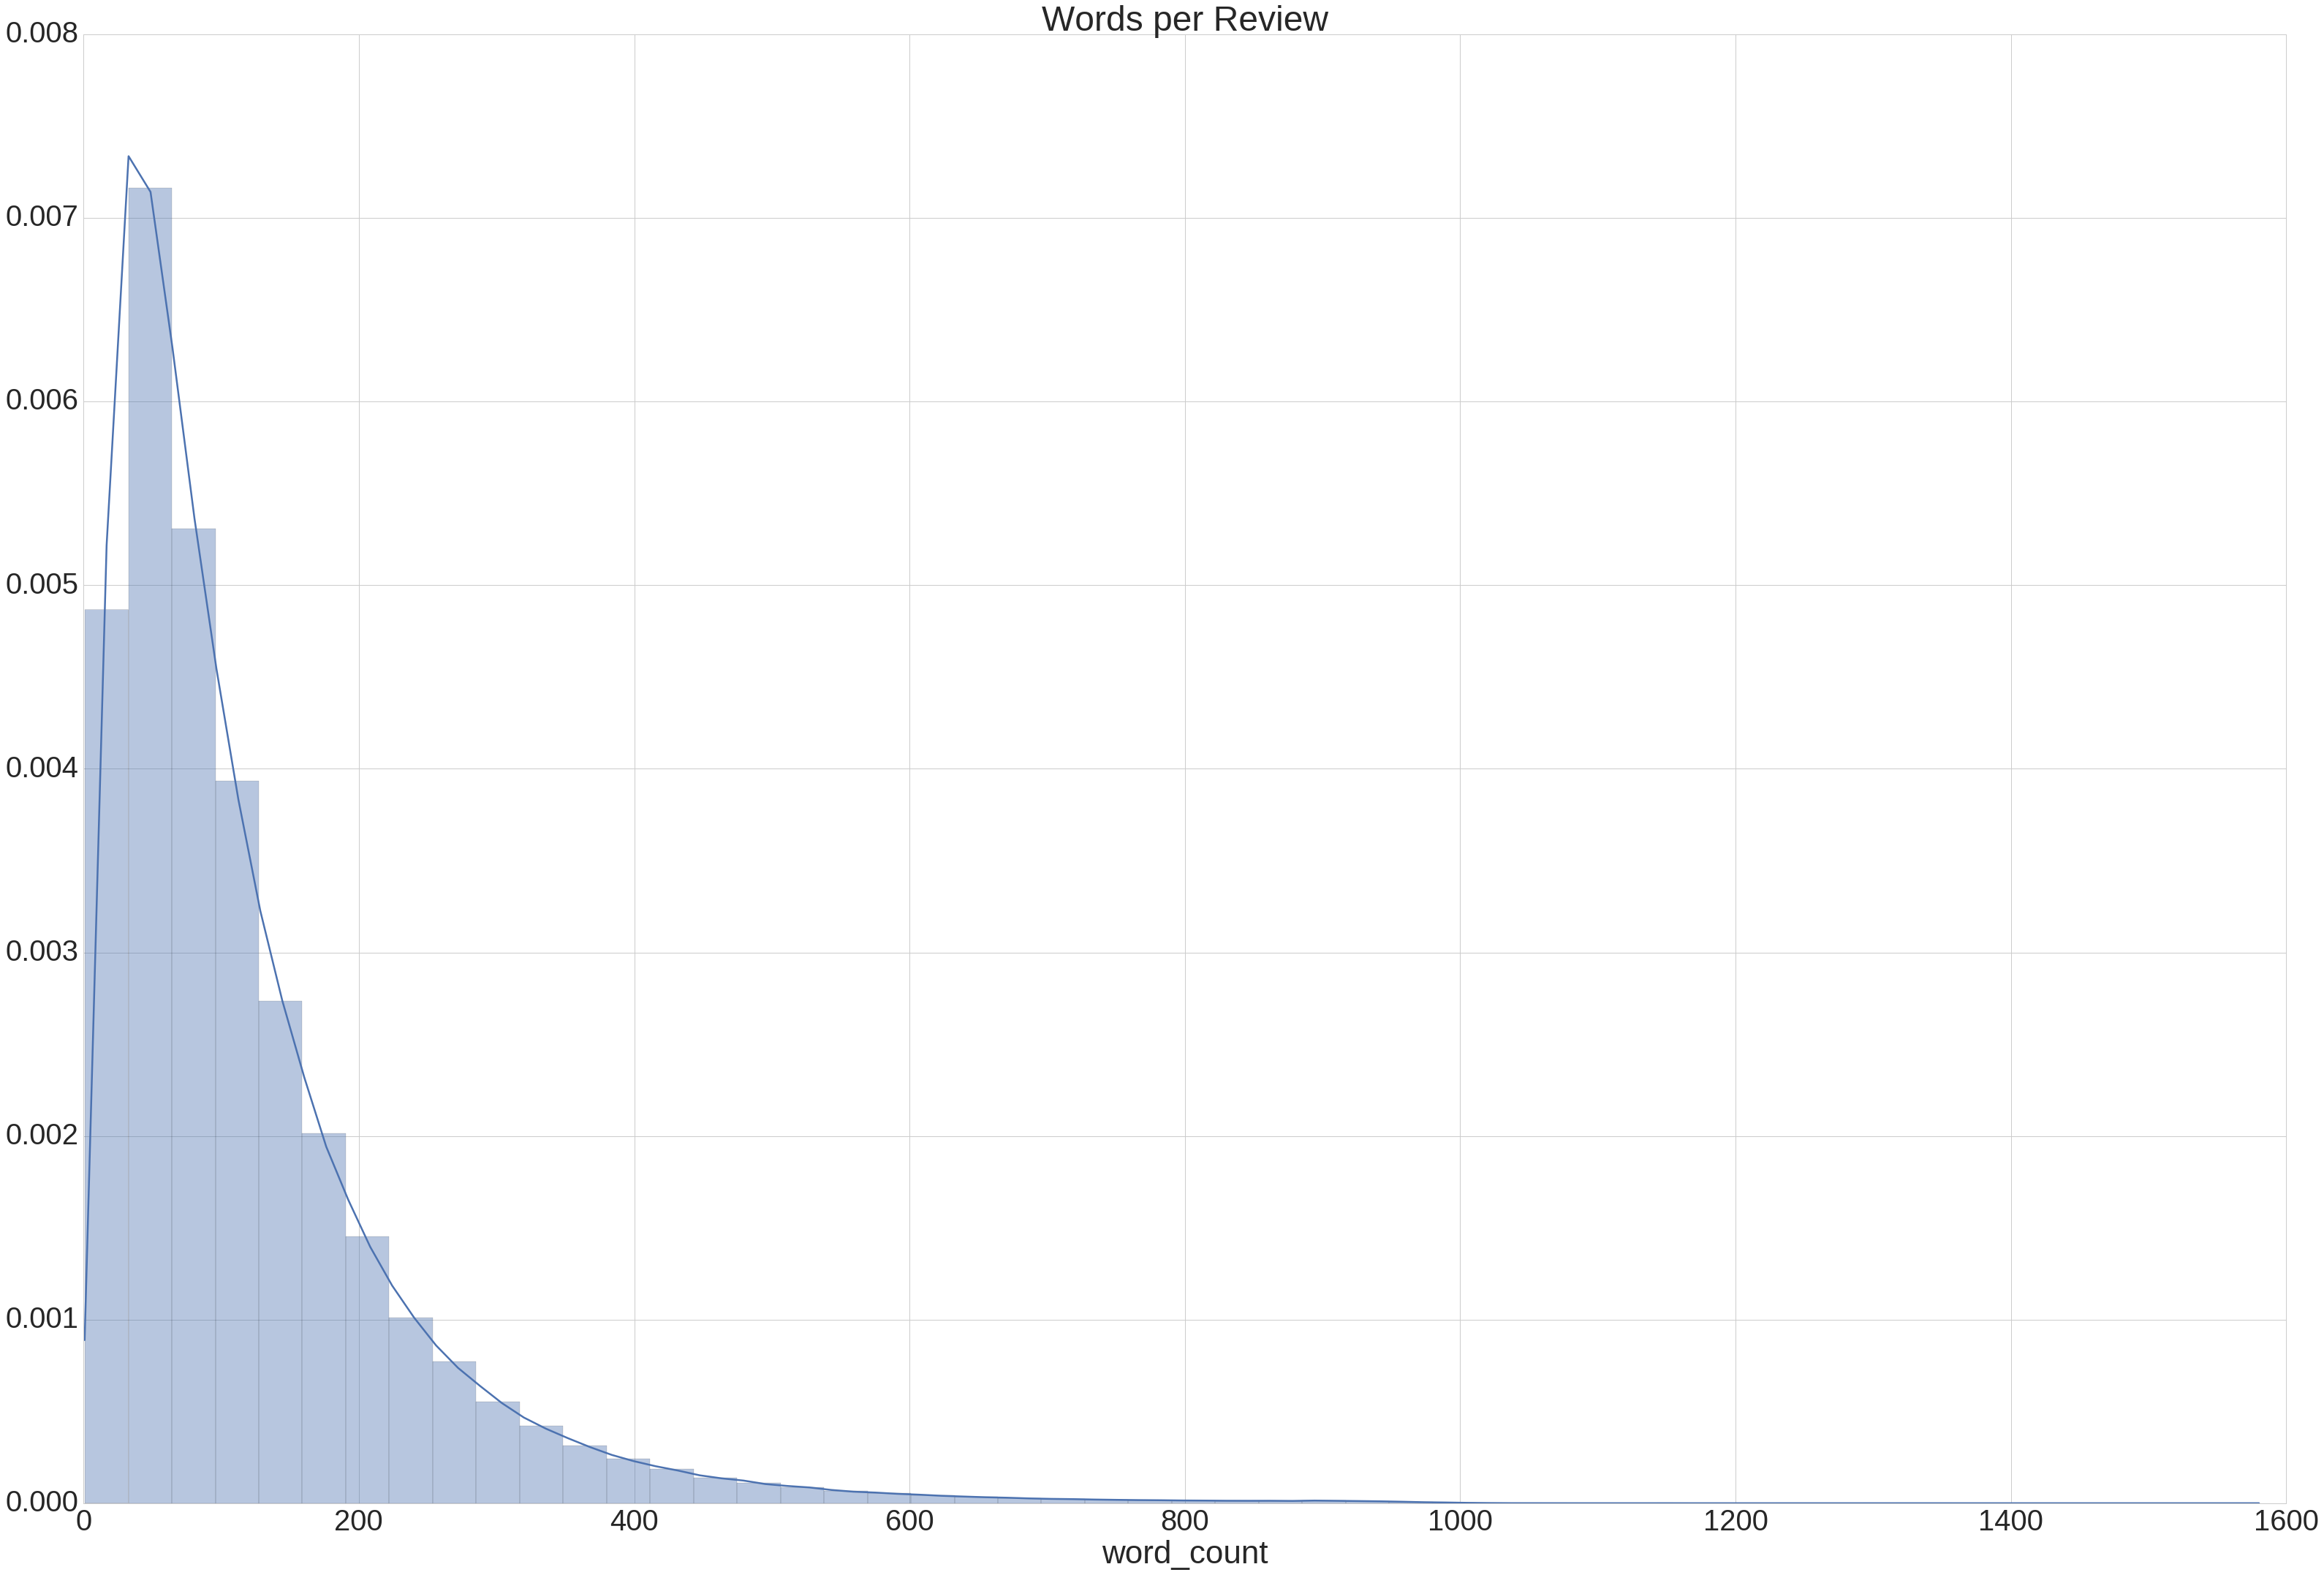

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
ax = sns.distplot(review_df['word_count'])
ax.set_title("Words per Review")

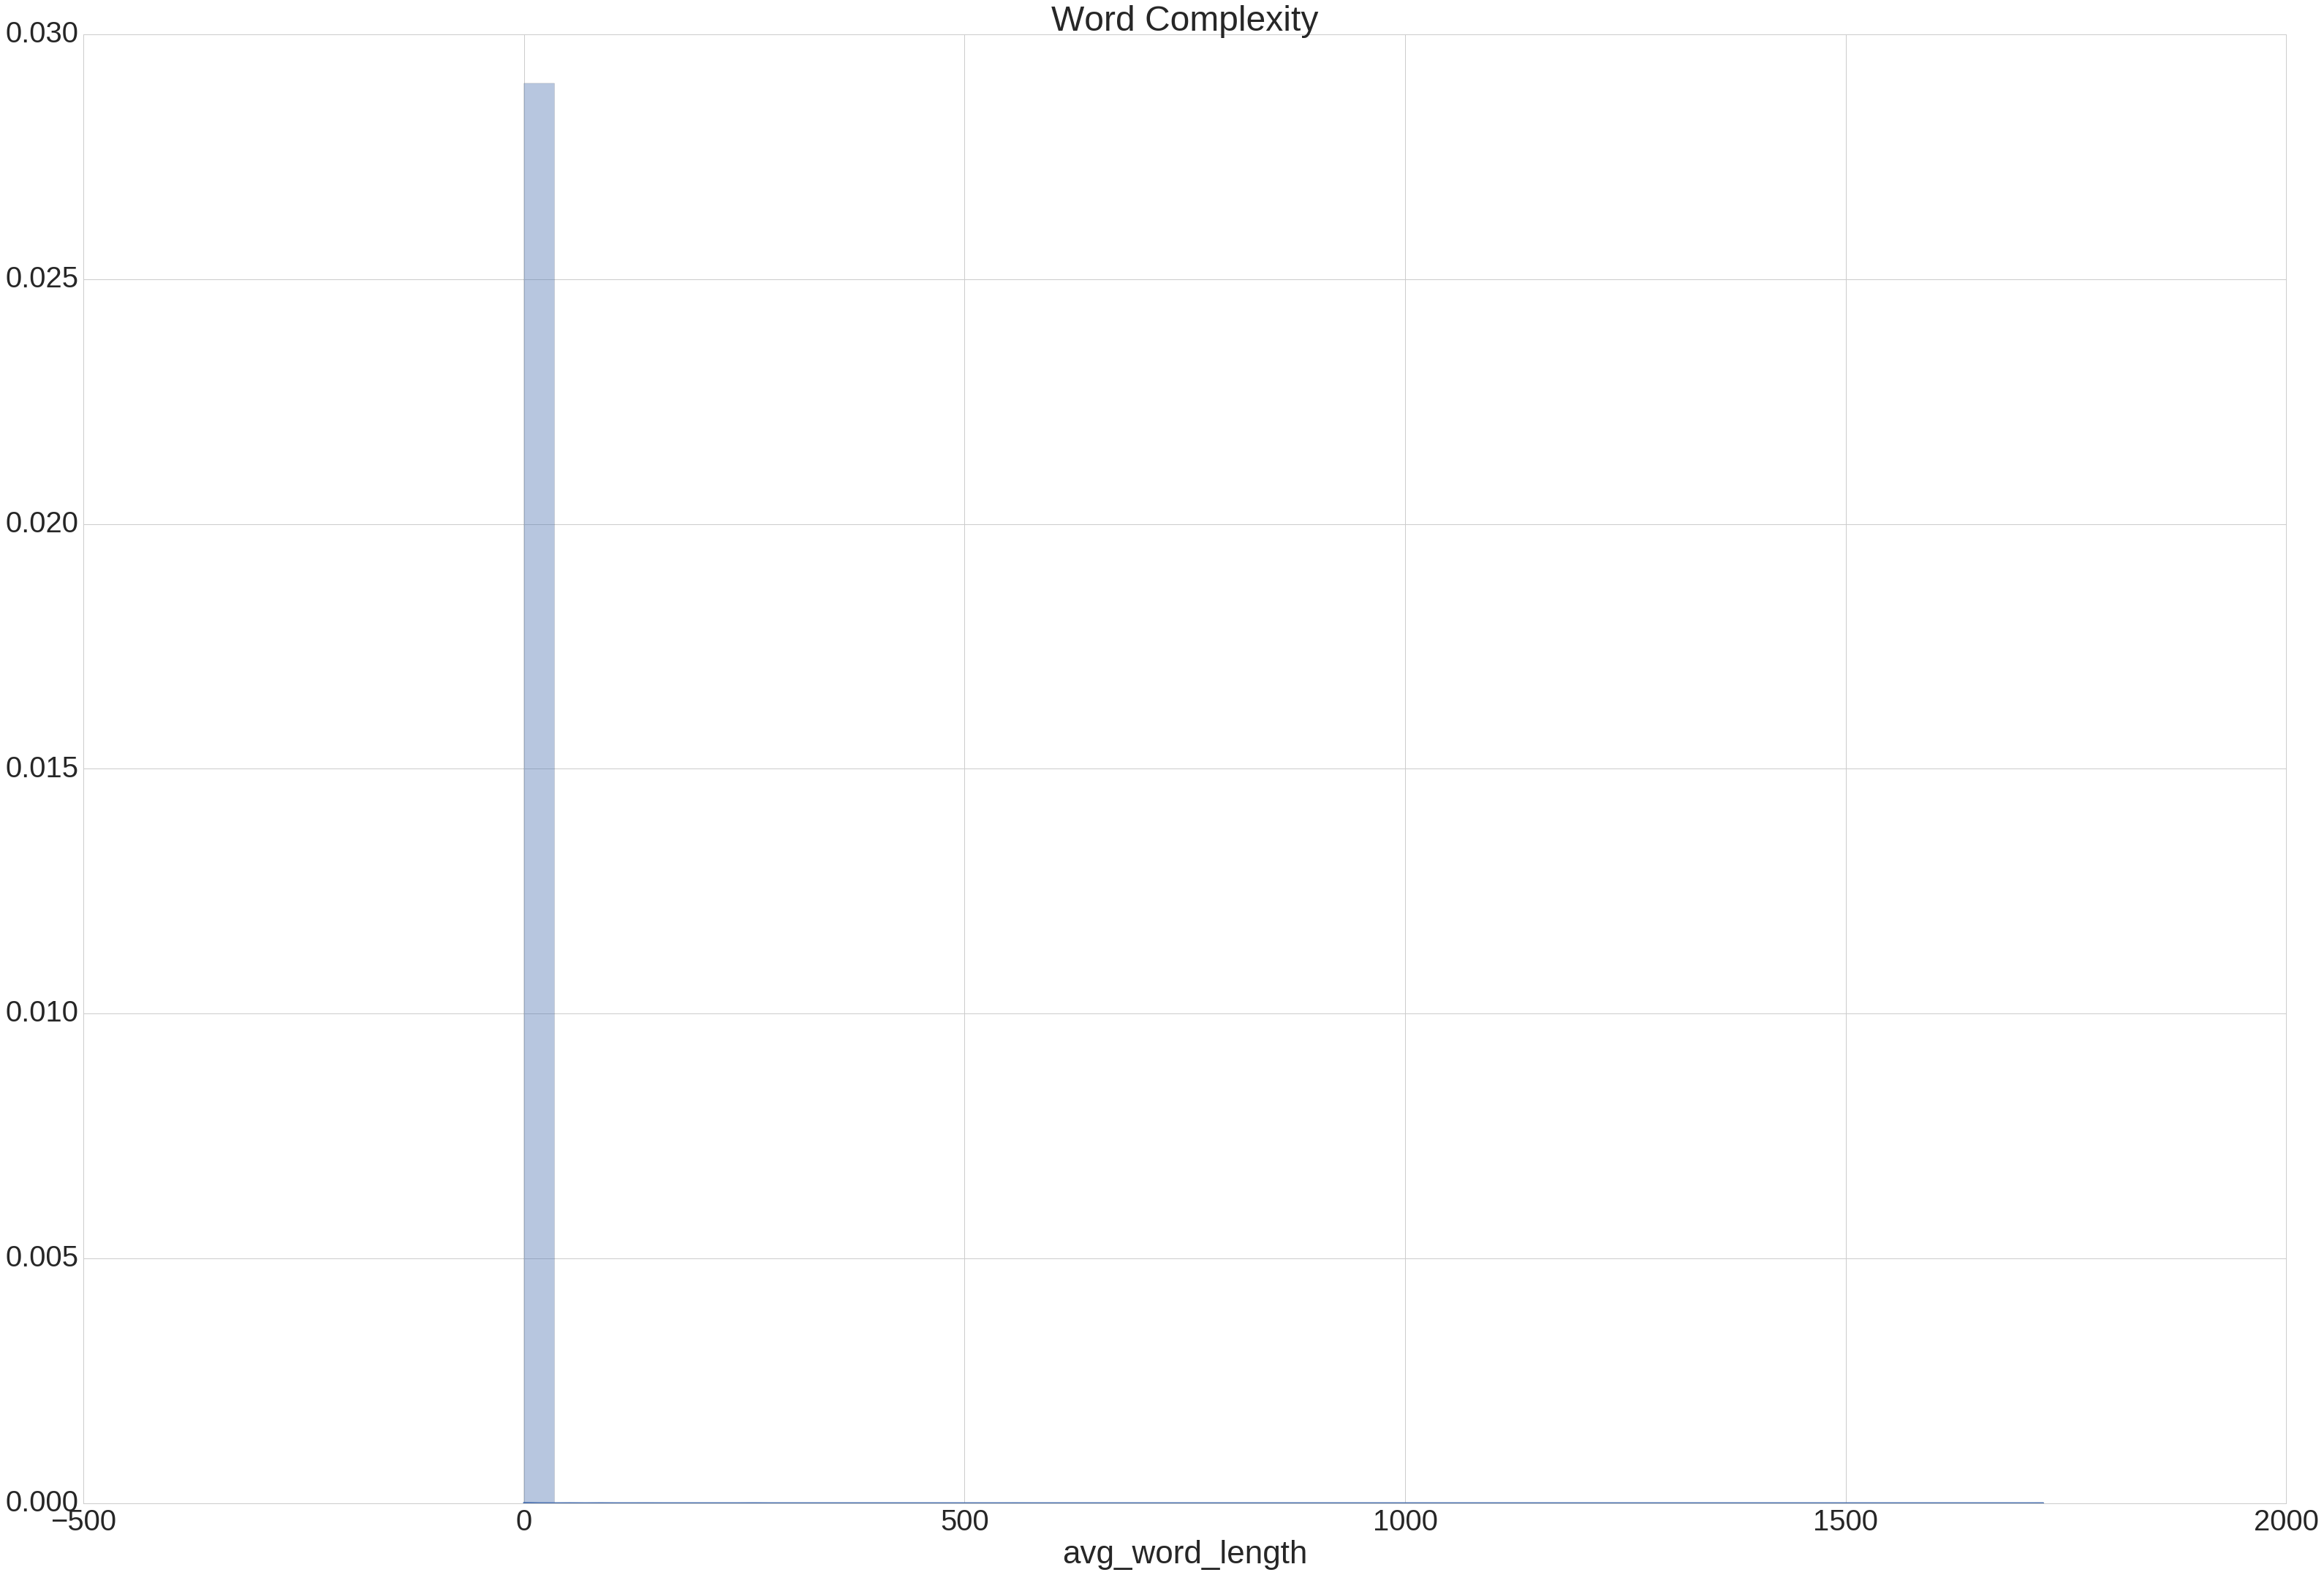

In [20]:
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
ax = sns.distplot(review_df['avg_word_length'])
ax.set_title("Word Complexity")

In [21]:
print(max(review_df['avg_word_length'].values))

1724.0


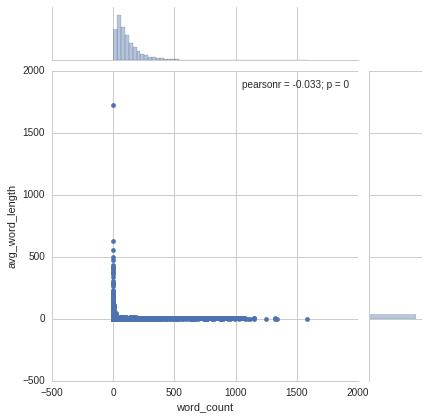

In [22]:
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.jointplot(x="word_count", y="avg_word_length", data=review_df)

In [23]:
def get_num_attrs(row):
    keys = row['attributes'].keys()
    return len(keys)

business_df.drop('neighborhoods', axis=1, inplace=True)
business_df.drop('open', axis=1, inplace=True)
business_df['num_attrs'] = business_df.apply(lambda row: get_num_attrs(row), axis=1)
business_df.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,review_count,stars,state,type,clean_city,attribute_count,top_level_category,num_attrs
0,"{'Ambience': {'hipster': False, 'upscale': Fal...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Thursday': {'close': '21:00', 'open': '11:00...",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,Pittsburgh,18,Restaurants,18
1,"{'Happy Hour': True, 'Outdoor Seating': False,...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,Pittsburgh,5,Nightlife,5
2,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,Pittsburgh,0,Automotive,0
3,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,Pittsburgh,1,Active Life,1
4,"{'Parking': {'street': False, 'validated': Fal...",HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 South Hills Village\nPittsburgh, PA 15241","{'Saturday': {'close': '21:00', 'open': '10:00...",40.357620,-80.059980,Verizon,5,2.5,PA,business,Pittsburgh,3,Shopping,3


In [24]:
final_df = pd.merge(review_df, business_df, on='business_id')

final_df.head()

,business_id,date,review_id,stars_x,type_x,user_id,votes,word_count,avg_word_length,attributes,...,longitude,name,review_count,stars_y,state,type_y,clean_city,attribute_count,top_level_category,num_attrs
0,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,review,PUFPaY9KxDAcGqfsorJp3Q,"{'funny': 0, 'useful': 0, 'cool': 0}",83,4.301205,"{'Ambience': {'hipster': False, 'upscale': Fal...",...,-79.900706,Mr Hoagie,4,4.5,PA,business,Pittsburgh,18,Restaurants,18
1,5UmKMjUEUNdYWqANhGckJw,2014-02-13,KPvLNJ21_4wbYNctrOwWdQ,5,review,Iu6AxdBYGR4A0wspR9BYHA,"{'funny': 0, 'useful': 0, 'cool': 0}",23,4.739130,"{'Ambience': {'hipster': False, 'upscale': Fal...",...,-79.900706,Mr Hoagie,4,4.5,PA,business,Pittsburgh,18,Restaurants,18
2,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,review,auESFwWvW42h6alXgFxAXQ,"{'funny': 0, 'useful': 0, 'cool': 0}",73,4.136986,"{'Ambience': {'hipster': False, 'upscale': Fal...",...,-79.900706,Mr Hoagie,4,4.5,PA,business,Pittsburgh,18,Restaurants,18
3,UsFtqoBl7naz8AVUBZMjQQ,2013-11-08,Di3exaUCFNw1V4kSNW5pgA,5,review,uK8tzraOp4M5u3uYrqIBXg,"{'funny': 0, 'useful': 0, 'cool': 0}",80,3.937500,"{'Happy Hour': True, 'Outdoor Seating': False,...",...,-79.886814,Clancy's Pub,4,3.5,PA,business,Pittsburgh,5,Nightlife,5
4,UsFtqoBl7naz8AVUBZMjQQ,2014-03-29,0Lua2-PbqEQMjD9r89-asw,3,review,I_47G-R2_egp7ME5u_ltew,"{'funny': 0, 'useful': 0, 'cool': 0}",137,4.065693,"{'Happy Hour': True, 'Outdoor Seating': False,...",...,-79.886814,Clancy's Pub,4,3.5,PA,business,Pittsburgh,5,Nightlife,5


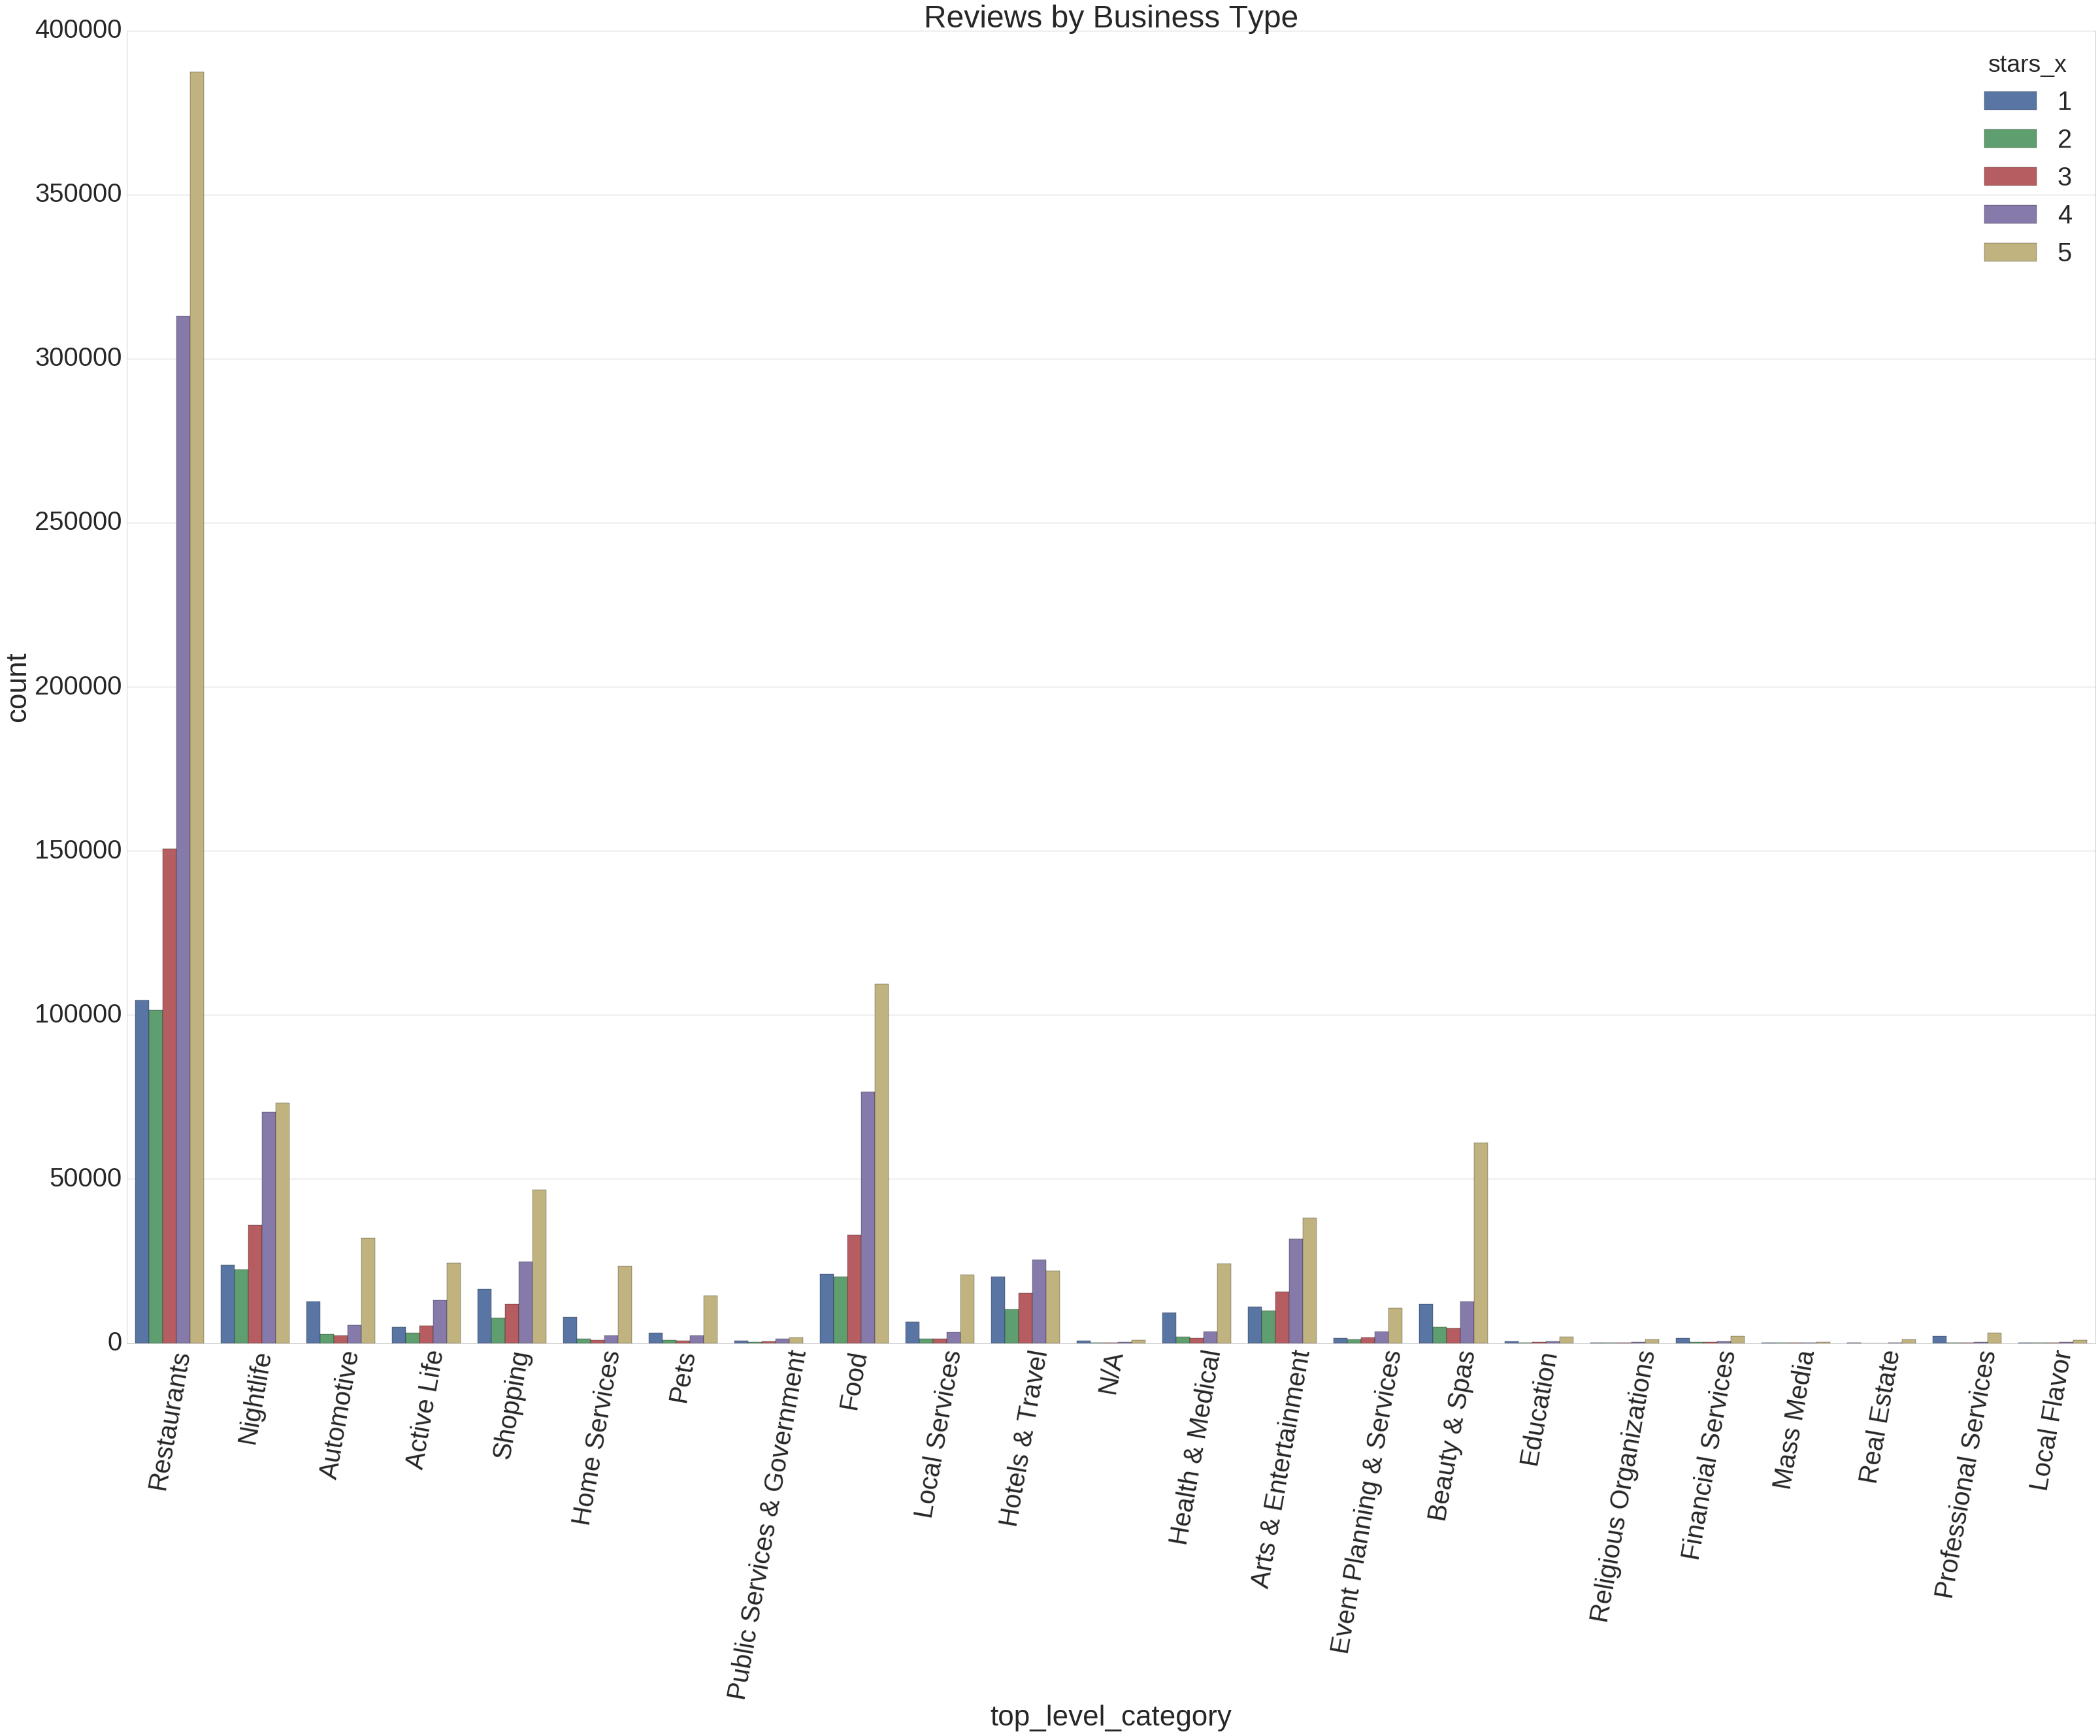

In [30]:
plt.figure(figsize=(54,36))
sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
ax =sns.countplot(x='top_level_category', hue='stars_x', data=final_df)
for item in ax.get_xticklabels():
    item.set_rotation(80)
ax.set_title("Reviews by Business Type")